# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The smartcab, if I'm reading the simulation's terminal log correctly, appears to never have moved. Its state is never updated and it likewise is idling in place through the entirety. Interestingly, the world around it appears to change, and so when it is idling in place while the stoplight before it is green, it receives a negative reward, whereas it receives a positive reward when that same light is red. The magnitude of those rewards appears to favor greater sized negative rewards when the smartcab is doing something wrong, e.g., idling at a green light, and smaller sized positive rewards when the smartcab is doing something right, e.g., idling at a red light. Interestingly, it also appears that there is a slightly positive reward for idling at a green light (usually, a not good thing to do) when the reward condition is explained as "agent not enforced to meet deadline". I think that means the smartcab is given some flexibility to not move when the light is green until a certain amount of time has passed, which seems like a safety producing action.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In agent.py, the three flags that can be set are learning, epsilon, and alpha. Learning is a boolean that determines whether the primary class within agent.py (LearningAgent) will in fact learn (improve/optimize itself) or not. Epsilon is the level of randomness the learner will use when "exploring" pathways for optimization and alpha is the rate or factor of learning. Obviously, the latter two flags are dependent on whether the class is set to learn or not.

In environment.py, there are several classes, including what I would call the primary class, Environment. This is the class called by LearningAgent (in agent.py) as the environment for creating the simulation. Within that class, the act function is called when the agent performs an action.

In simulator.py, there are two ways to present information to the viewer of the simulation. The first is the render_text function that logs the simulation (actions/rewards/notices) to the command line interface. The second is the render function that interfaces with pygame to provide a graphical user interface representation of the simulation.

In planner.py, the next_waypoint functions checks the delta between the destination and the smartcab location using the East-West direction before checking the North-South direction.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


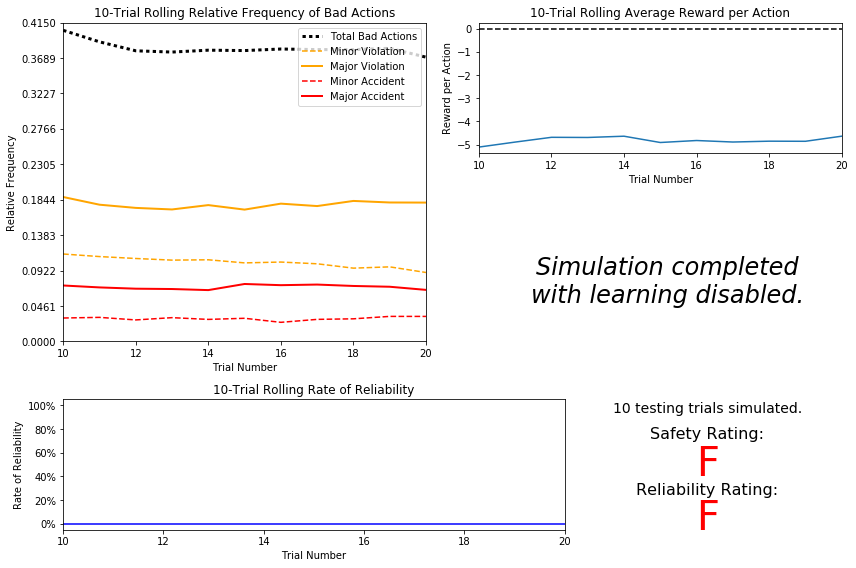

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

Using random direction to "drive" our actions was not a great way to operate our smartcab, according to our simulation results and analysis. In the first graph, showing the frequency of our bad actions rolling over 10-trials, we can see that our total bad actions occurred with a frequency between ~0.41 and ~0.37 over the course of those 10 trials. While better than a coin flip, that's still a terrible frequency of bad actions and translates to seeing a bad action greater than 1 out of 3 times we take an action and approaching 1 out of 2 (i.e., the coin flip). What's worse is that when digging down on what those bad actions are, we can see that we have a frequency of major accidents somewhere around ~0.08 or 8% of the time we took an action. That means that we're seeing a major accident at about 1 out of every 12 actions we take. When combined with the somewhat lower frequency of minor accidents, hovering around 0.04 or 4% of our actions, we're now having some sort of accident at around 1 out of every 9 actions we take. That's bad!

The above analysis matches well when we look at the next graph, showing our rolling rewards over those same 10 trials. There is very little variance, and we stay firmly pinned around -5, sometimes reaching up toward -4 but never really getting close. Consistent negative rewards at that magnitude show that we are not making good decisions and indeed are being repeatedly reinforced to do better with those negative results.

The bottom two panes of our analytics dashboard really bring this point home. We score 0% reliability across the entire 10-trial rolling rate and a summary score of F for both safety and reliability. We could have done worse driving (theoretically, we could have made a bad decision every time!), but clearly, the random direction model without learning produces extremely bad results. This shouldn't be a surprise, however, as we disabled learning and thus were relying on chance to guide our decisions. Our smartcab driver was essentially blind-folded, and likewise in real-life I doubt any riders would be enticed to get in with a blind-folded driver.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

For safety, the most relevant features are within the inputs, primarily light, but also the input about traffic that could collide with our smartcab. The traffic to the right of the smartcab at the intersection is not very relevant, in my opinion given that the traffic from that direction is going to be stopped when the smartcab goes forward or to the left (at least by the rules) and will not collide with the smartcab when it turns right. Meanwhile, the traffic to the right is relevant to the extent the smartcab turns right at a red light, which although illegal where I'm from (New York City) is allowed in this game! We should keep right given the potential for collision in that allowable action. I also find light and oncoming traffic highly relevant for the same reason. When thinking about safety, these are the features that will dictate whether or not the smartcab commits a violation, or more importantly, causes an accident. For instance, light is the most important in my opinion, because if the smartcab does not stop on a red, the likelihood of an accident occuring is quite high, as we saw in the random direction trials. The smartcab likewise must have a policy of taking only no or right turn action (assuming no conflicting traffic from the left) at a red light, else our safety grade is going to fall tremendously. Secondarily, once that light turns green, it's important to know what the vehicle across from the cab is doing. For instance, if that vehicle is going straight as we wish to go left, the smartcab must have a policy to wait until that traffic clears before proceeding (i.e., 'None' followed by 'Left', assuming that is the only oncoming vehicle). Again, our safety score is likely to fall precipitously absent policies mapped to these features. As far as safety is concerned, I do not find the waypoint or deadline features very relevant, as they relate to the logic of arriving at a certain place by a certain time. Safety is about not commiting a violation or causing an accident.

For efficiency, I find the most relevant feature to be waypoint although deadline is relevant. The trade-off between potential bad actions between reliability and safety should the deadline be close (i.e., a low value), argues for eliminating deadline from the policy determination. With regard to the waypoint feature, being able to map (literally) the smartcab to the destination defines whether the smartcab is operating efficiently, absent other features in the environment. Or in other words, operating in a vacuum, that feature tells us how efficient the smartcab's movements are toward the destination. Since we're not in a vacuum, however, we also need to consider the other relevant input features above as part of our measure of efficiency. For instance, if we don't stop at a red light and cause an accident, our efficiency is going to take a major hit. So, the input data is also relevant, albeit likely less relevant to knowing where we're going on what timeline (e.g., driving to NYC instead of San Jose from San Francisco is probably going to be of bigger relevance to our efficiency score than getting into an accident on the way to San Jose.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Using the features I've selected as most relevant from Q.4 (waypoint, light, oncoming, deadline), our feature space looks as follows:

{'waypoint': 3 values, 'light': 2 values, 'oncoming': 3 values, 'left': 3 values}

Each state likewise has 3 x 2 x 3 x 3 number of combinations, or 2 * 3^3, which equals 54 different combinations per calculation of state. That's a quite manageable number with modern CPUs and should allow for a reasonable training time even as our number of trials increases.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

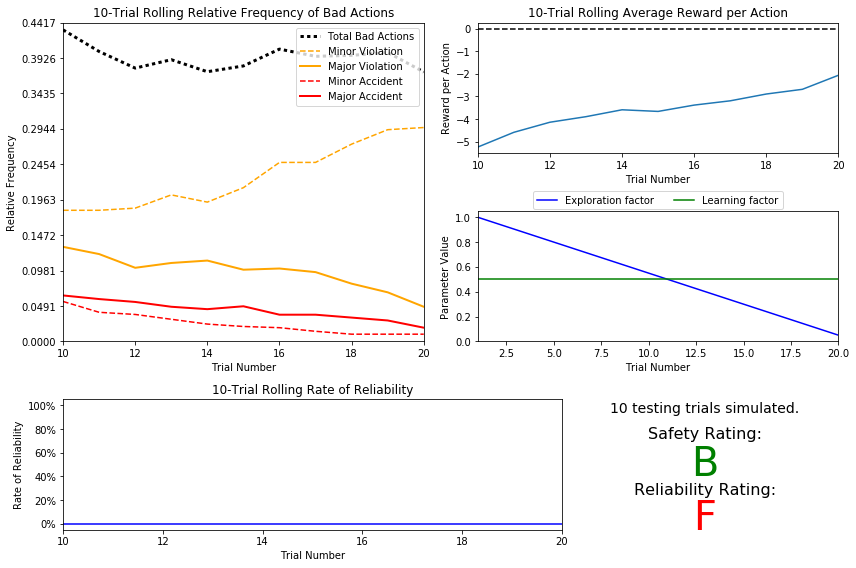

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

By examining the analytics for the Q-learning simulation at a default (not optimizing) stage, there are several improvements to note, as well as areas where improvement is needed (looking ahead to optimization). In the first graph, there is a positive (i.e., decreasing in frequency) trend for major and minor accidents, as well as major violations. Our last training trials tended to produce a high frequency of minor violations, so our overall bad actions trend is not decreasing (well ok, the regression line would be slightly decreasing, but it's fairly flat). Oddly, that's the one thing in this graph that remains the same from the entirely random driving simulation we conducted at the outset, but when unpacking the four bad actions, we see that they are not the same (3 out of 4 decrease, 1 out of 4 increases; whereas all 4 bad actions were fairly flat in the random training trials.) We can surmise that we either are not taking into account minor violations as a high enough priority given our feature set (a reminder that we have included all features for our training in these trials) and may need to re-weight our reward system. Or, we might conclude that more training is needed to appropriately reduce all bad actions. Jumping straight to the fourth pane, we can see that the decreasing trend in 3 out of 4 of our bad actions, including both majors, has resulted in a B rating during testing trials. Not bad. This definitely looks like our policies are improving (learning!).

Moving to our next graph, we note that our rewards increased over the last 10 training trials, but remained negative. Extrapolating a regression line from that graph, we can hope to achieve positive or at least a 0 if the trials continue. Or in other words, we're learning! Our rewards are increasing, which means the smartcab is taking into account policies that penalize bad actions with negative rewards and provide positive rewards for good actions. This is also a good time to note the epsilon/alpha graph below the rewards: here we see the linear decay of epsilon, which works well for 20 training trials (0.05 decay per iteration), and the constant alpha learning value. If we change our decay function, we're likely going to have to change the number of training trials to ensure a gradual decay over the decay function commensurate with the training space.

Finally, we get to reliability in the bottom panes. We got an F in testing and we can see why in the training graph: our reliability was a constant 0% or so throughout the entire last 10 training trials. Clearly, we're not rewarding our deadline high enough. In fact, we scored the same during the random trials. Something to consider during optimization. 



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

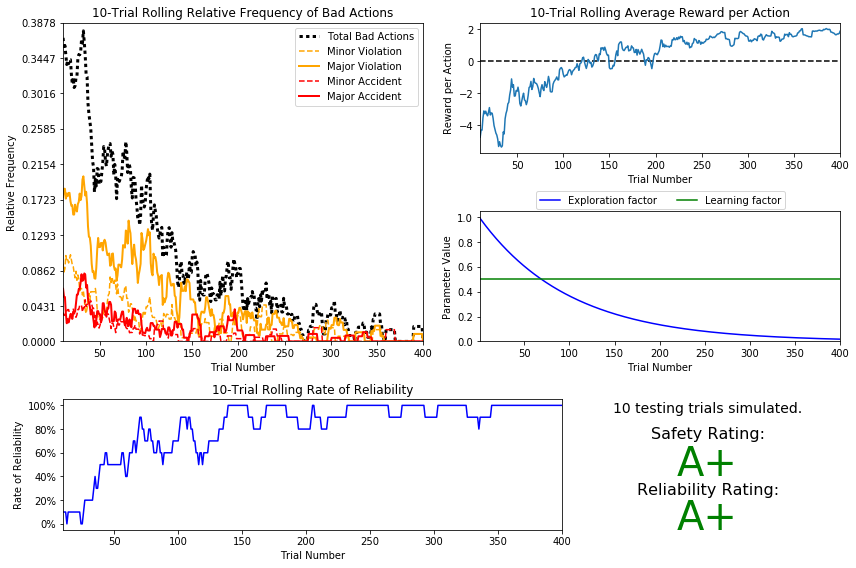

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The improved driving agent uses a straight-forward epsilon decay function where a starting epsilon value less than 1.0 is decayed by updating epsilon as a function of the increasing trial number (n), specifically epsilon = 0.99^n. I used 0.99 as the starting value to maintain a high epsilon (below 1.0) at the beginning of the decay and 400 trials to decay epsilon down to a fairly low number with plenty of time to learn (I chose a tolerance of 0.018 to accord to the number of chosen trials (0.99^400 = 0.179).

This learner made significant improvement with the frequency of total bad actions dropping to lower than 4% by the last training trial, which I would anecdotally peg as lower than a human driver. In addition, the reliability of the learner drastically improved (from 0%, that wasn't too hard), to hover near 100% reliability! This was night and day from the earlier learners. Indeed, in terms of the learner having successfully learned an appropriate policy, we can see the reward chart staying positive (with a couple of dips early on) from about the 150th training trial forward. Our double A+ ratings for safety and reliability bring the visible improvements from these graph panes to a nice codified grade for this Q-Learner. We can probably do better (maybe?) but we made marked improvement by optimizing and increasing our training time.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Example 1: 
State: {'waypoint': 'right', 'light': 'red', 'oncoming': 'forward', 'left': None}
Expected Action (Policy): 'right' (we can turn right on a red when there are no cars coming from the left)

Actual 1:
('right', 'red', 'forward', None)
 -- None : 1.20
 -- forward : -10.43
 -- right : 2.47
 -- left : -10.05
 
Analysis: 
We have an optimal policy recorded for the smartcab here, in my view. Going forward or left, both actions that could cause a collision are negatively rewarded at a full order of magnitude more than the provided positive reward. Meanwhile, both None and right are safe actions and receive positive reward. Since right is both safe and efficient (making the trip more reliable), it is 2x as much as None. Optimal!

Example 2: 
State: {'waypoint': 'right', 'light': 'red', 'oncoming': 'forward', 'left': 'forward'}
Expected Action (Policy): None (we should not turn right on a red when there is a car coming from the left)

Actual 2:
('right', 'red', 'forward', 'forward')
 -- None : 2.25
 -- forward : -30.04
 -- right : -17.41
 -- left : 0.00

Analysis: 
We have a slightly suboptimal policy recorded here, but likely because additional training is needed to address the 'left' action, which remains at default 0.0. For the other actions, we are optimal. Taking no action is clearly correct and is given the only positive reward. Forward is the worst decision (along with left) as that action would cause a major collision with the car from the left moving forward (and the oncoming car moving moving forward should a left be made). If more training had occurred, I expect left would have been equally negatively rewarded. At half that negative reward, probably because of the more minor severity of the collision expected, is making the turn to the right. In the end, however, absent the lack of training on the left turn in this scenario, it is almost optimal and correct.

Example 3: 
State: {'waypoint': 'left', 'light': 'green', 'oncoming': 'forward', 'left': None}
Expected Action (Policy): None (we should not turn left even on a green when there is an oncoming car)

Actual 3:
('left', 'green', 'forward', None)
 -- None : -4.66
 -- forward : 0.38
 -- right : 0.76
 -- left : -18.42
 
Analysis:
I do not believe this is an optimal policy. The good news is that going left is clearly the most negatively rewarded because it would result in a major accident. That said, I believe the remaining rewards are incorrect. Understanding that taking no action may in fact be less safe and less reliable than taking some known safe action (forward or right here), I can understand why the training designated None as negatively rewarded. In my view, however, it should be positively weighted and in fact be the highest positive weight. Moving forward or right are suboptimal actions, but also safe, and moving forward is more efficient than moving right as the waypoint remains the same distance away along the x-axis of the game (albeit potentially farther away on the y-axis). Moving right will definitely add more time to correcting back to the destination and should be minimally positvely weighted, if not negatively weighted. In sum, I find an optimal policy to be as follows:
-- None : 2.
-- forward: 1.
-- right: -1.
-- left: -20.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I think that gamma is not used here, and indeed could negatively affect our results, because it would effectively weight reliability higher than safety. Here's why: given the waypoint property as producing greater rewards because of a discount factor, the smartcab may choose to pursue the waypoint to the detriment of its safety rating, i.e., it would be able to maximize its rewards by following waypoints at the expense of negative rewards resultant from accidents/violations. In line with that theory, I also think that since the environment is stochastic, it would be impossible for the smartcab to truly maximize its rewards using the discount factor, as it could find itself instead with large negative rewards at the next state (a red light with oncoming traffic from its orthogonal directions), even though it pursued the gamma maximized waypoint.

Another way to look at is if gamma maximized safety. In that case, the smartcab might find itself driving in circles to stay safe at the expense of pursuing waypoints. In either case, the balance between safety and reliability could be negatively impacted by the use of a discount factor here.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.